## 터키 투자 펀드 데이터 - TEFAS
2019년 1월 23일부터 2024년 1월 23일까지의 투자 시계열 데이터

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
connection = sqlite3.connect("/home/leejieun/workspace/kaggle-notebooks/datasets/soraka/turkey-investment-funds-data/FundData.db")
cursor = connection.cursor()

In [3]:
data = pd.read_sql_query(
    """
    SELECT * FROM FundData
    where date BETWEEN date('2018-01-01') AND date ('2024-01-23')
    and code in ("AFT", "YAY")
    """, connection
)

In [4]:
data.head()

,date,price,code,title,market_cap,number_of_shares,number_of_investors,tmm,repo,other,...,private_sector_bond,participation_account,foreign_currency_bills,asset_backed_securities,real_estate_certificate,foreign_debt_instruments,government_lease_certificates,fund_participation_certificate,government_bonds_and_bills_fx,private_sector_lease_certificates
0,2019-01-24,0.029912,AFT,AK ASSET MANAGEMENT NEW TECHNOLOGIES FOREIGN E...,2.042855e+08,6829584278,5432,None,0,2.95,...,0.0,0,0,0,0,0,0,0.00,0,0
1,2019-01-24,56.498361,YAY,YAPI KREDİ ASSET MANAGEMENT FOREIGN TECHNOLOGY...,4.154754e+08,7353760,3103,None,0,0.00,...,0.5,0,0,0,0,0,0,0.43,0,0
2,2019-01-25,0.030004,AFT,AK ASSET MANAGEMENT NEW TECHNOLOGIES FOREIGN E...,2.048839e+08,6828481715,5432,None,0,2.53,...,0.0,0,0,0,0,0,0,0.00,0,0
3,2019-01-25,56.553472,YAY,YAPI KREDİ ASSET MANAGEMENT FOREIGN TECHNOLOGY...,4.147757e+08,7334222,3103,None,0,0.00,...,0.5,0,0,0,0,0,0,0.43,0,0
4,2019-01-28,0.030333,AFT,AK ASSET MANAGEMENT NEW TECHNOLOGIES FOREIGN E...,2.071495e+08,6829269077,5432,None,0,2.66,...,0.0,0,0,0,0,0,0,0.00,0,0


In [5]:
data.shape

(2473, 33)

In [7]:
data.isna().sum()

date                                    0
price                                   0
code                                    0
title                                   0
market_cap                              0
number_of_shares                        0
number_of_investors                     0
tmm                                  2473
repo                                    0
other                                   0
stock                                   0
eurobonds                               0
bank_bills                              0
derivatives                             0
reverse_repo                            0
term_deposit                            0
treasury_bill                           0
foreign_equity                          0
government_bond                         0
precious_metals                         0
commercial_paper                        0
fx_payable_bills                        0
foreign_securities                      0
private_sector_bond               

In [8]:
data["date"] = pd.to_datetime(data.date)

In [9]:
aft = data[data.code == "AFT"].sort_values("date")
yay = data[data.code == "YAY"].sort_values("date")

aft["change_price"] = aft["price"].pct_change() * 100
yay["change_price"] = yay["price"].pct_change() * 100

aft["change_investor"] = aft["number_of_investors"].pct_change() * 100
yay["change_investor"] = yay["number_of_investors"].pct_change() * 100

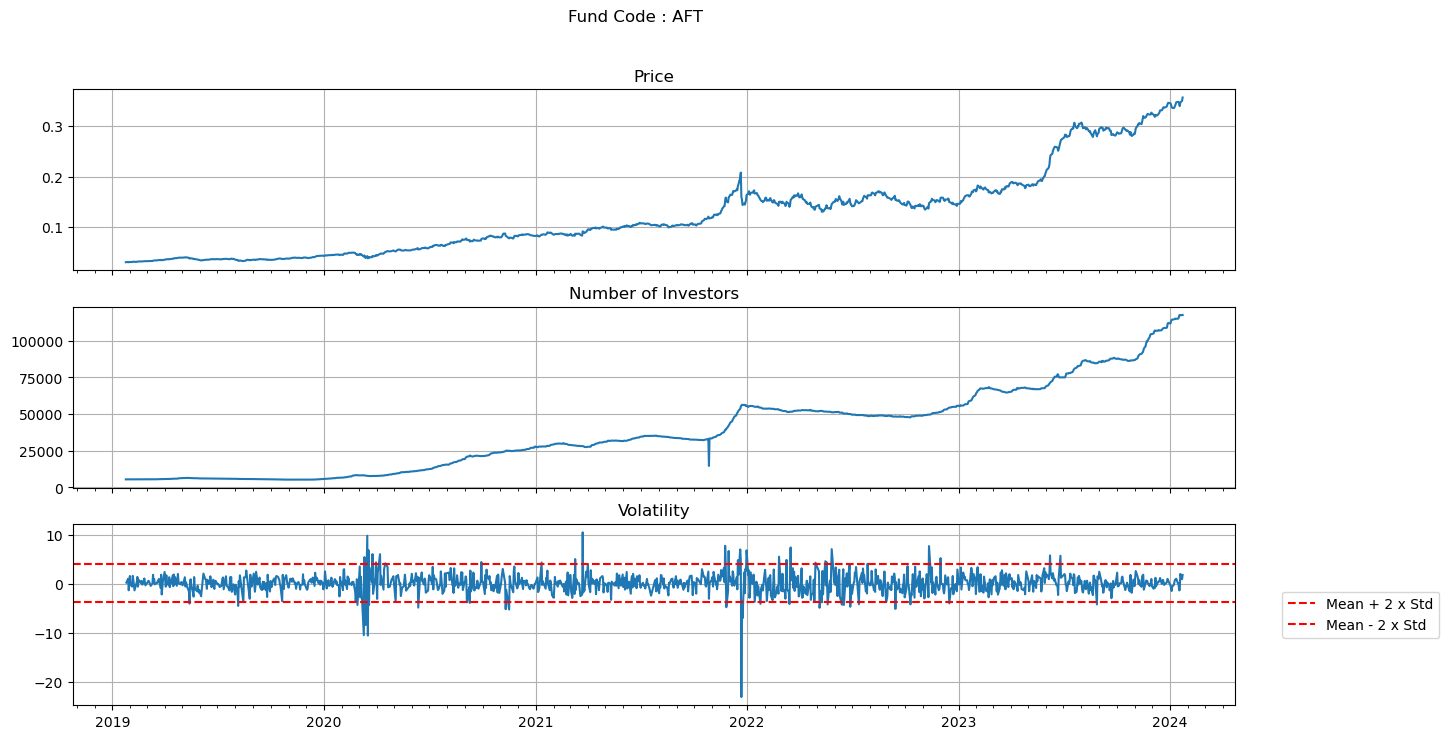

In [13]:
years = mdates.YearLocator()
months = mdates.MonthLocator()

fig, axs = plt.subplots(3, figsize=(15,8), sharex=True)
fig.suptitle('Fund Code : AFT')

axs[0].plot(aft["date"], aft["price"])
axs[0].set_title("Price")
axs[0].grid(True)
axs[0].xaxis.set_major_locator(years)
axs[0].xaxis.set_minor_locator(months)
## investors
axs[1].plot(aft["date"], aft["number_of_investors"])
axs[1].set_title("Number of Investors")
axs[1].grid(True)
## volatility
axs[2].plot(aft["date"], aft["change_price"])
axs[2].axhline(y= aft.change_price.mean() + aft.change_price.std() * 2, color='r', linestyle='dashed',label = "Mean + 2 x Std")
axs[2].axhline(y= aft.change_price.mean() - aft.change_price.std() * 2, color='r', linestyle='dashed',label = "Mean - 2 x Std")
axs[2].legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
axs[2].xaxis.set_major_locator(years)
axs[2].xaxis.set_minor_locator(months)
axs[2].set_title("Volatility")
axs[2].grid(True)
plt.show()

In [11]:
data.describe()

,date,price,market_cap,number_of_shares,number_of_investors,repo,other,stock,eurobonds,bank_bills,...,private_sector_bond,participation_account,foreign_currency_bills,asset_backed_securities,real_estate_certificate,foreign_debt_instruments,government_lease_certificates,fund_participation_certificate,government_bonds_and_bills_fx,private_sector_lease_certificates
count,2473,2473.000000,2.473000e+03,2.473000e+03,2473.000000,2473.0,2473.000000,2473.000000,2473.0,2473.0,...,2473.000000,2473.0,2473.0,2473.0,2473.0,2473.0,2473.0,2473.000000,2473.0,2473.0
mean,2021-08-02 10:42:15.867367680,108.997318,2.521933e+09,7.547230e+09,27464.411241,0.0,0.868722,0.084343,0.0,0.0,...,0.040627,0.0,0.0,0.0,0.0,0.0,0.0,0.104517,0.0,0.0
min,2019-01-24 00:00:00,0.029912,1.873397e+08,7.139810e+06,2489.000000,0.0,-0.060000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,2020-04-30 00:00:00,0.104999,8.228652e+08,1.332772e+07,7560.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,2021-08-13 00:00:00,58.726801,2.161745e+09,1.690690e+07,22446.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75%,2022-11-04 00:00:00,178.044177,3.889282e+09,1.737825e+10,34595.000000,0.0,1.470000,0.020000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
max,2024-01-23 00:00:00,634.663861,7.904480e+09,2.505379e+10,117696.000000,0.0,8.990000,3.830000,0.0,0.0,...,0.520000,0.0,0.0,0.0,0.0,0.0,0.0,1.790000,0.0,0.0
std,NaN,148.031113,1.800033e+09,8.619433e+09,24077.314953,0.0,1.256217,0.431271,0.0,0.0,...,0.118686,0.0,0.0,0.0,0.0,0.0,0.0,0.340190,0.0,0.0
